# Brain Tumor Detection CNN Model

### Loading Dataset and Preprocess, and Basic Setting

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
dataset_path = "/kaggle/input/brain-tumor-mri-dataset"

train_dir = os.path.join(dataset_path, "/kaggle/input/brain-tumor-mri-dataset/Training")
test_dir = os.path.join(dataset_path, "/kaggle/input/brain-tumor-mri-dataset/Testing")

categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [ ]:
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

image_size = (150, 150)
batch_size = 32
epochs = 50

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### Build Model (Sequential) and Model Training

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/50
178/178 [==============================] - 203s 1s/step - loss: 0.9952 - accuracy: 0.5574 - val_loss: 1.2119 - val_accuracy: 0.5109
Epoch 2/50
178/178 [==============================] - 199s 1s/step - loss: 0.7664 - accuracy: 0.6952 - val_loss: 0.8112 - val_accuracy: 0.6719
Epoch 3/50
178/178 [==============================] - 190s 1s/step - loss: 0.6399 - accuracy: 0.7500 - val_loss: 1.1424 - val_accuracy: 0.6086
Epoch 4/50
178/178 [==============================] - 191s 1s/step - loss: 0.5707 - accuracy: 0.7782 - val_loss: 1.0112 - val_accuracy: 0.6187
Epoch 5/50
178/178 [==============================] - 190s 1s/step - loss: 0.5292 - accuracy: 0.7933 - val_loss: 0.6604 - val_accuracy: 0.7750
Epoch 6/50
178/178 [==============================] - 189s 1s/step - loss: 0.4625 - accuracy: 0.8213 - val_loss: 0.5569 - val_accuracy: 0.7781
Epoch 7/50
178/178 [==============================] - 189s 1s/step - loss: 0.4546 - accuracy: 0.8289 - val_loss: 0.5980 - val_accuracy: 0.7516

### Performance Analysis

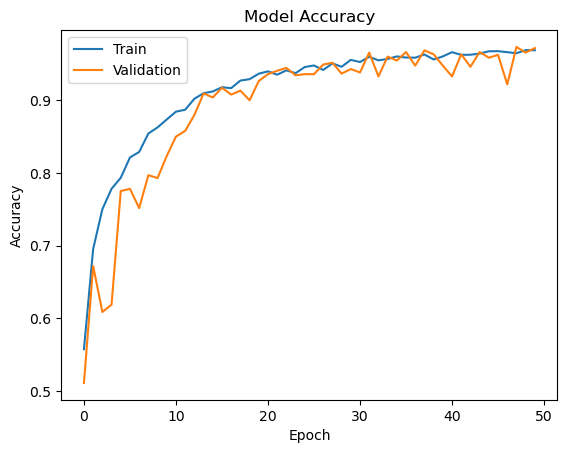

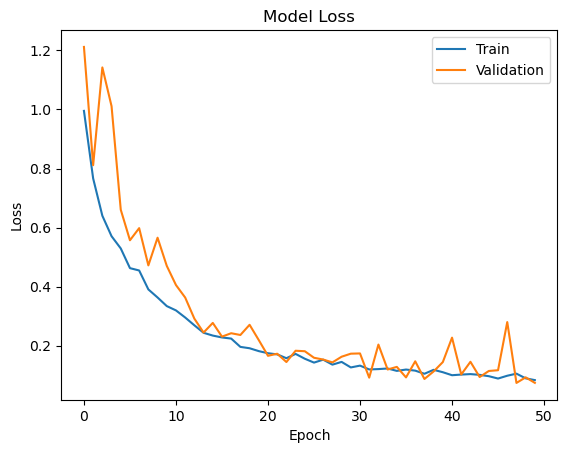

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

41/41 [==============================] - 12s 286ms/step


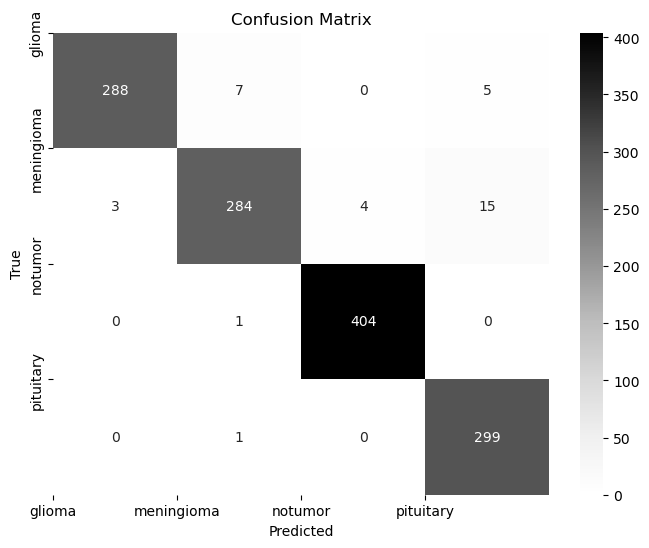

In [ ]:
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greys")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

In [ ]:
cm = confusion_matrix.numpy()
labels = ["glioma", "meningioma", "notumor", "pituitary"]

accuracies = {}
total_correct_predictions = 0
total_predictions = 0

for i, label in enumerate(labels):
    correct_predictions = cm[i, i]
    total_class_predictions = np.sum(cm[i, :])
    accuracy = correct_predictions / total_class_predictions
    accuracies[label] = accuracy
    total_correct_predictions += correct_predictions
    total_predictions += total_class_predictions

print("Accuracy for each category:")
for category, acc in accuracies.items():
    print(f"{category}: {acc:.2f}")

overall_accuracy = total_correct_predictions / total_predictions
print(f"Overall Average Accuracy: {overall_accuracy:.2f}")

Accuracy for each category:
glioma: 0.96
meningioma: 0.93
notumor: 1.00
pituitary: 1.00
Overall Average Accuracy: 0.97


In [ ]:
model.save("brain_tumor_detection_cnnmodel1.h5")